### Clustering Methods 
the two most popular 
* K-means 
* hierarchical clustering.



In [1]:
library(repr)

In [2]:
# stimulated data with 2 clusters 

set.seed(2)
x <- matrix(rnorm(50*2), ncol = 2)
x[1:25, 1] <- x[1:25, 1] + 3
x[1:25, 2] <- x[1:25, 2] - 4

In [3]:
# perform k-mean clustering with k =2 

km.out <- kmeans(x, 2, nstart = 20)
km.out$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

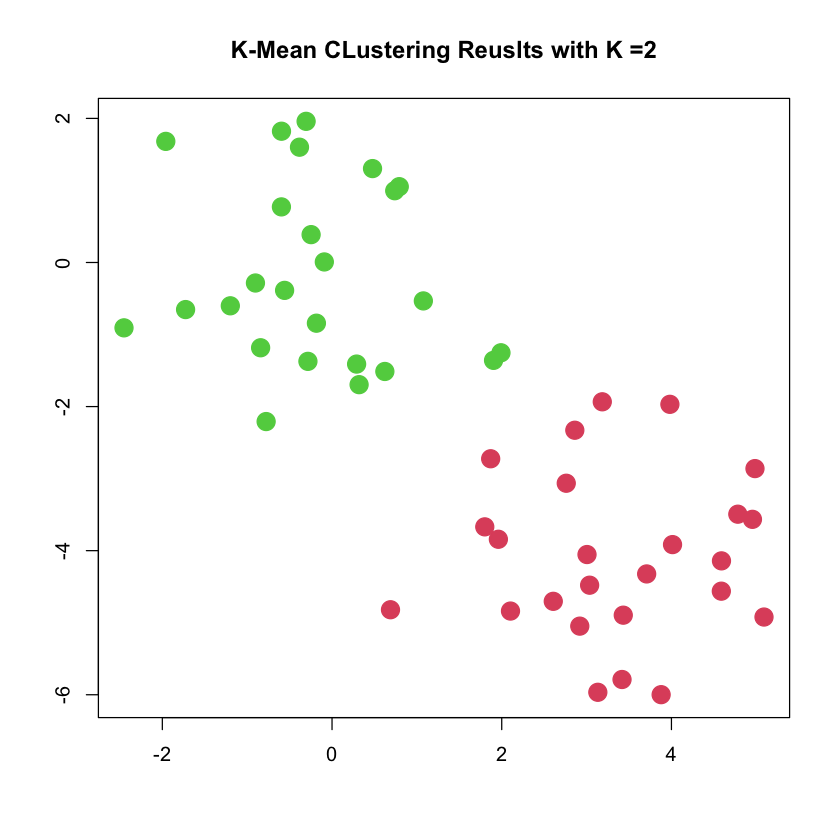

In [4]:


plot(x, col = (km.out$cluster + 1), 
	main = "K-Mean CLustering Reuslts with K =2", 
	xlab = "", ylab = "" , pch = 20, cex = 3
	)


In [5]:
set.seed(4)
km.out <- kmeans(x, 3, nstart = 30)
km.out

K-means clustering with 3 clusters of sizes 10, 23, 17

Cluster means:
        [,1]        [,2]
1  2.3001545 -2.69622023
2 -0.3820397 -0.08740753
3  3.7789567 -4.56200798

Clustering vector:
 [1] 3 1 3 1 3 3 3 1 3 1 3 1 3 1 3 1 3 3 3 3 3 1 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

Within cluster sum of squares by cluster:
[1] 19.56137 52.67700 25.74089
 (between_SS / total_SS =  79.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

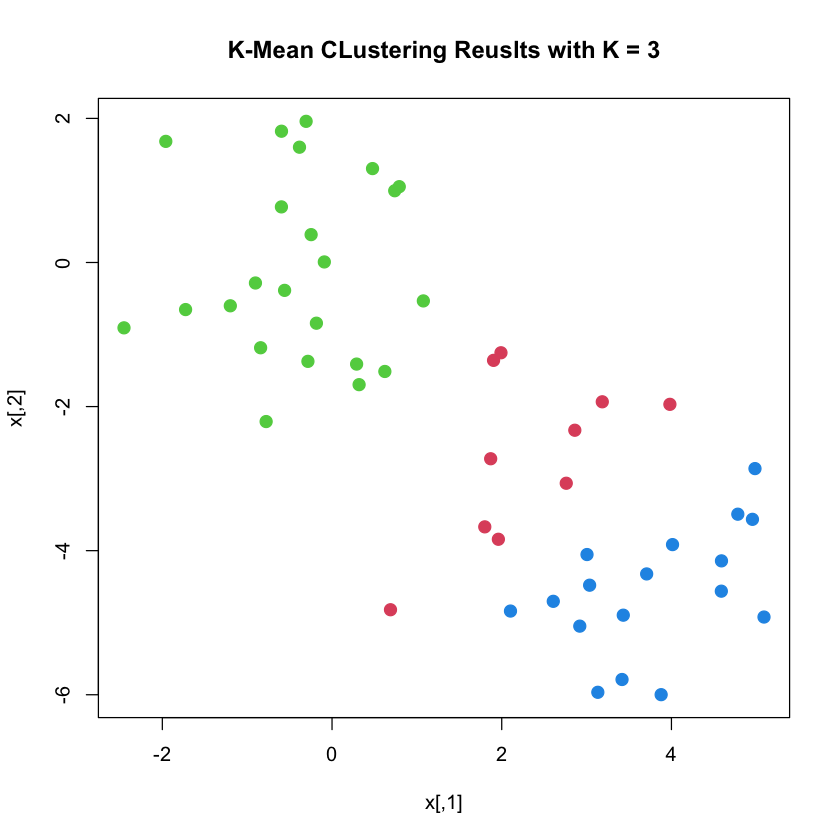

In [6]:
plot(x, col = (km.out$cluster + 1),
     main = "K-Mean CLustering Reuslts with K = 3",
    pch = 20, cex = 2)

* When 𝐾=3 : nstart used to initialize multiple cluster assignment.
* kmeans() will report only best results 

In [7]:
set.seed(4)
km.out <- kmeans(x, 3, nstart = 1)
km.out$tot.withinss


[1] 104.3319

In [8]:
km.out <- kmeans(x, 3, nstart = 20)
km.out$tot.withinss

[1] 97.97927

* km.out$tot.withinss is the total within-cluster sum of squares, which we seek to minimize by performing 𝐾-means clustering. 
* The individual within-cluster sum-of-squares are contained km.out$withinss.
* always running 𝐾-means clustering with a large value of nstart, such as 20 or 50, since otherwise an undesirable local optimum may be obtained.
* also, always use set.seet() for reproducibility. 

### Hierarchical Clustering

* hclust() ;  hierarchical clustering
* plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering, with Euclidean distance as the dissimilarity measure
* We begin by clustering observations using complete linkage. The dist() : inter-observation Euclidean distance matrix.


In [9]:
hc.complete <- hclust(dist(x), method = "complete")

In [10]:
hc.average <- hclust(dist(x), method = "average")
hc.single <- hclust(dist(x), method = "single")

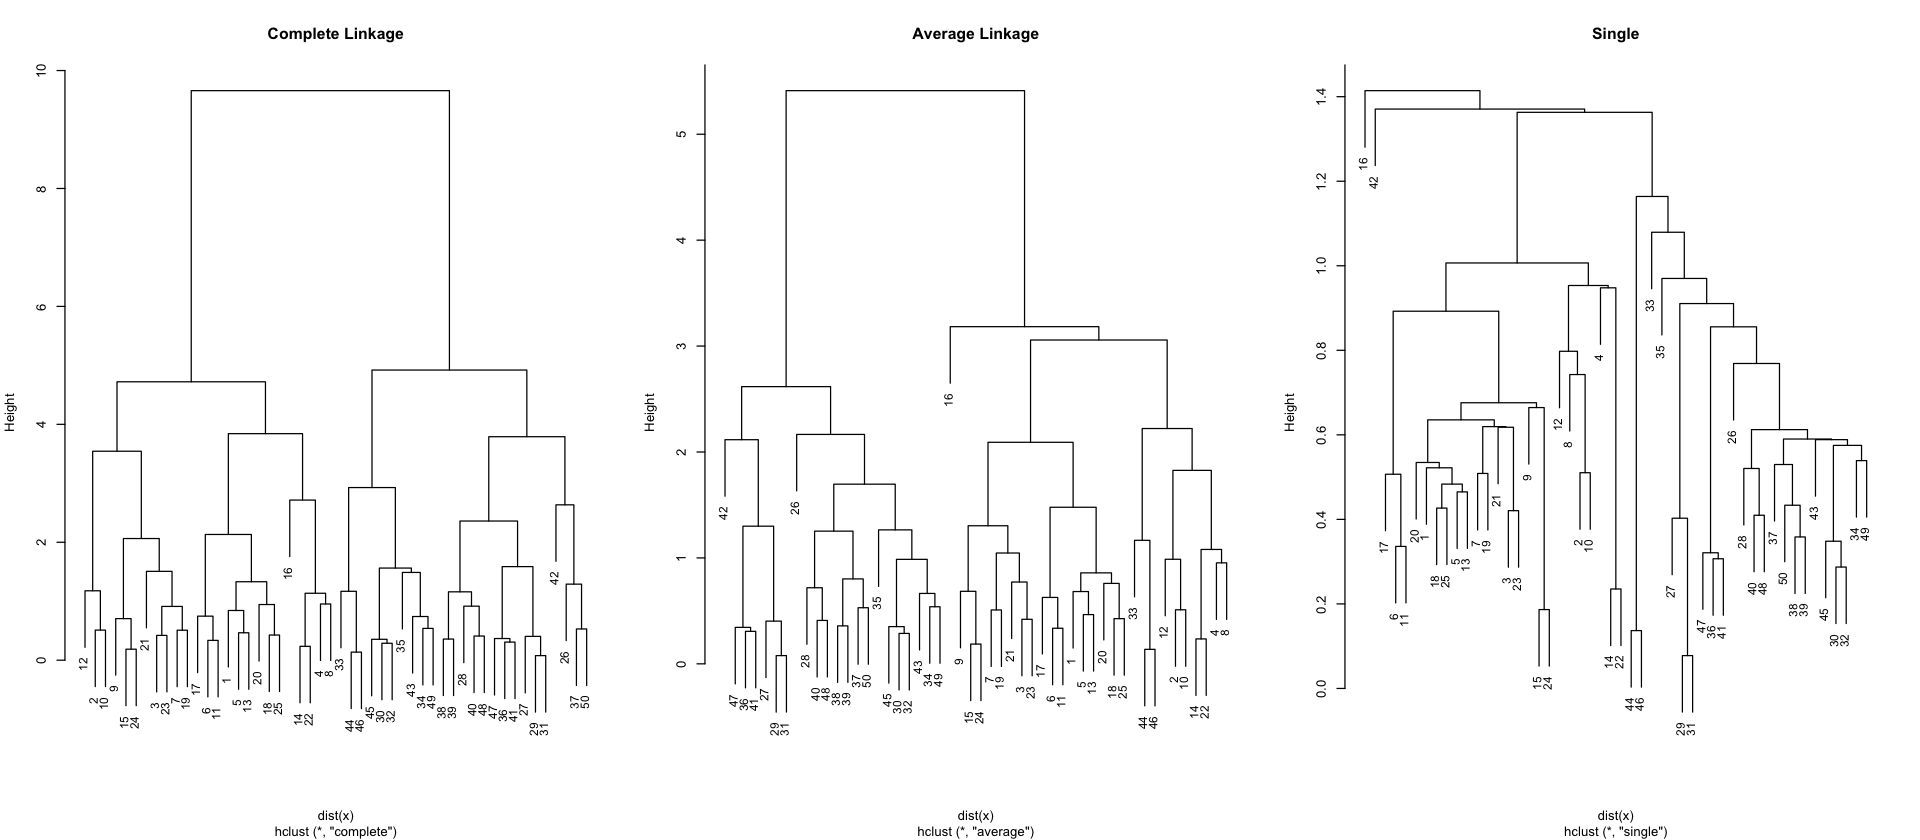

In [12]:
options(repr.plot.width = 16, repr.plot.height = 7) 
par(mfrow = c(1,3))
plot(hc.complete, cex = 0.9, main = "Complete Linkage")
plot(hc.average, cex = 0.9, main = "Average Linkage")
plot(hc.single, cex = 0.9, main = "Single")

In [13]:
cutree(hc.complete, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [14]:
cutree(hc.average, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

In [15]:
cutree(hc.single, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

* To determine the cluster labels for each observation associated with a given cut of the dendrogram, we can use the cutree() function
* The second argument to cutree() is the number of clusters we wish to obtain.
* For this data, complete and average linkage generally separate the observations into their correct groups. However, single linkage identifies one point as belonging to its own cluster. A more sensible answer is obtained when four clusters are selected, although there are still two singletons.



In [16]:
cutree(hc.single, 4)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

### 
* The second argument to cut trees is number of clusters we wish to obtain. 
* For this data complete and average linkage generally seperate the observation into their correct groups. 
* However, single linkage identifies one point as belonging to its own cluster. 
* A more sensible answer is obtained when 4 clusters are sleected, although there are still two singletons. 

##### Scale before heirachical clustering 

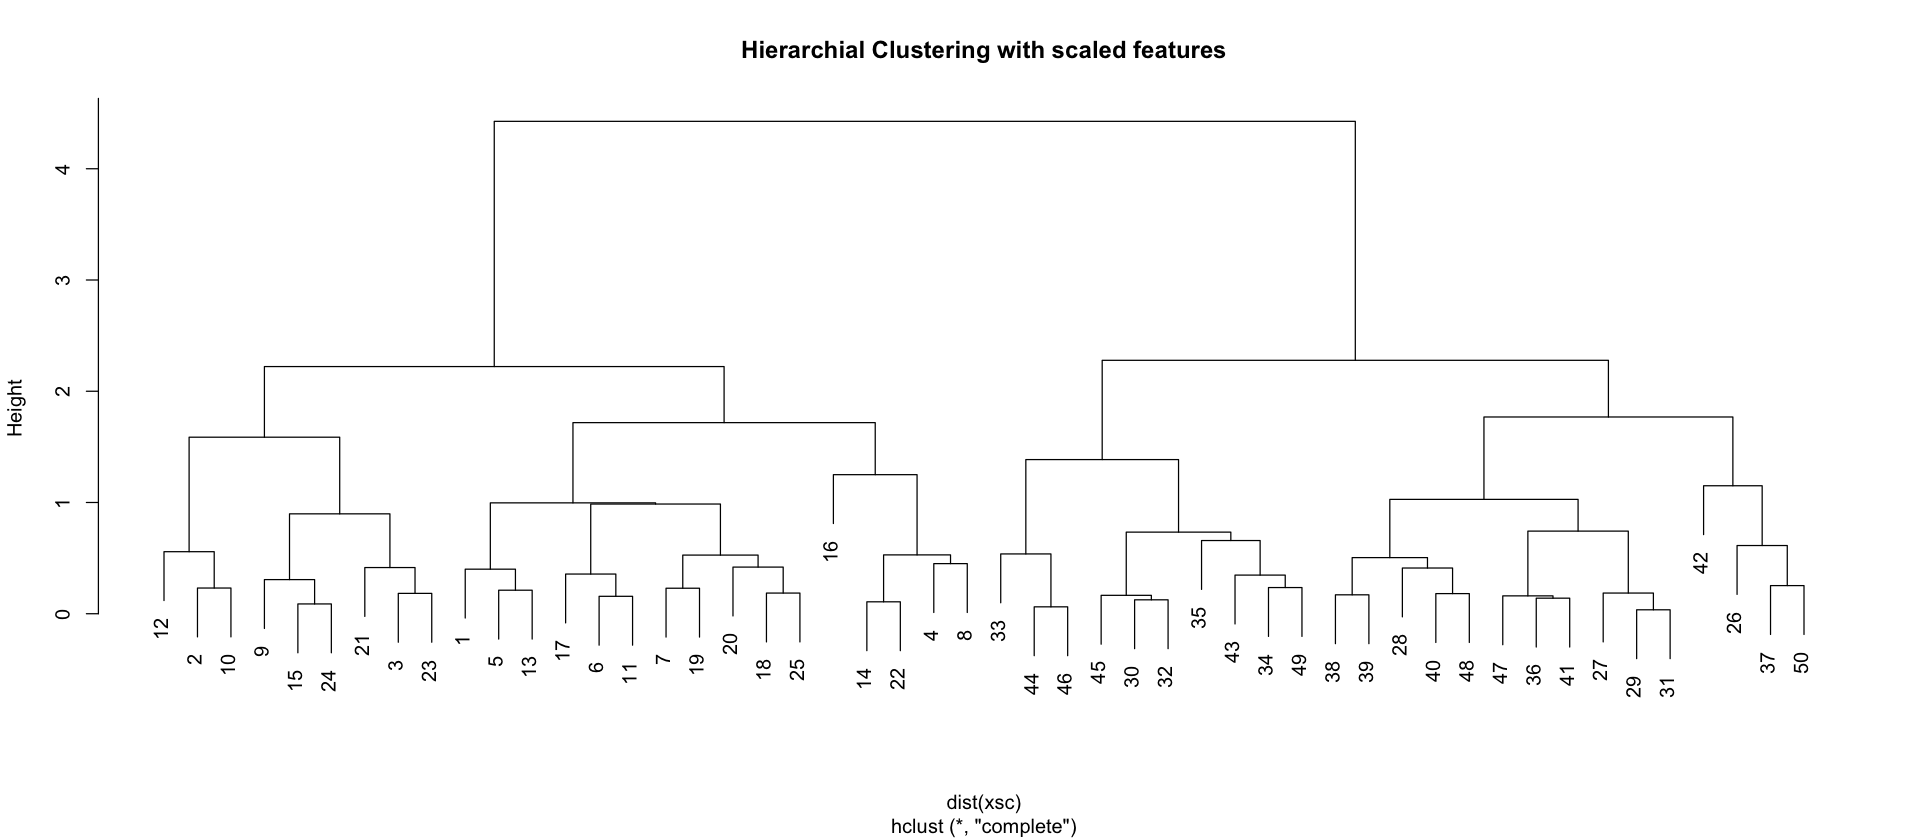

In [17]:
# to scale the variables before performing heirachical clustering of the observation

xsc <- scale(x)
plot(hclust(dist(xsc), method = "complete"),
	main = "Hierarchial Clustering with scaled features")